# Data Lab

## Chapter 3. Exploratory Data Analysis

#### Authors: 
    Faustino Vazquez Gabino | Elshan Dashtiyev
#### Supervisors  : 
    Prof. Tijana Janjic | Dr. Ramezani Ziarani, Maryam

### 3.1 Importing libraries and data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = "result_last_Maryam.csv"
data = pd.read_csv(file_path)
data.drop(columns="Run Number", inplace=True)

In [5]:
data

,phic,h_rain,alpha,Velocity,Height,Rain
0,899.706719,90.190740,0.000892,"[[0.010799882501991228], [0.009855476258547132...","[[89.98135734095531], [89.98545560343335], [89...","[[1.0864955729948101e-07], [3.017822251660096e..."
1,899.799918,90.180419,0.000400,"[[0.01035123736773532], [0.008246628456653601]...","[[89.98675236146151], [89.98917796240191], [89...","[[0.00011593105179524585], [0.0001181363135407..."
2,899.827861,90.248562,0.000955,"[[0.009881864105294548], [0.008554994957547545...","[[89.98109834859936], [89.98327823186862], [89...","[[5.029113289563279e-07], [5.119193260607787e-..."
3,899.887985,90.212106,0.000917,"[[-0.0025341882699104813], [-0.000264394990128...","[[89.94736300955029], [89.95051482751616], [89...","[[0.00036473116019414113], [0.0003762392733625..."
4,899.871240,90.242351,0.000399,"[[0.015061786674556123], [0.014376011505152105...","[[89.976589238761], [89.98859226341733], [89.9...","[[0.00023379228869580042], [0.0001003901893146..."
...,...,...,...,...,...,...
16030,899.725398,90.235675,0.000964,"[[0.004424919411160305], [0.003606617379454383...","[[89.9897313540184], [89.9901728670604], [89.9...","[[2.3753296557049672e-07], [2.4474785279288445..."
16031,899.892179,90.192215,0.000651,"[[0.003340111037832195], [0.00253129818836351]...","[[89.97786087347184], [89.98242125541951], [89...","[[2.2400180156733575e-05], [1.8783283795066944..."
16032,899.789632,90.245760,0.000611,"[[0.017930415550245576], [0.01666660564311642]...","[[89.91397654635455], [89.91633943482715], [89...","[[0.0005098720457306829], [0.00048016398431015..."
16033,899.882513,90.173615,0.000779,"[[0.01962298086065267], [0.01818991013803015],...","[[89.97982434921556], [89.98717250562733], [89...","[[0.00021166319785758032], [0.0001320855751653..."


### 3.2 Converting Data

In [2]:
# Defining the targets variables
parameters = data[['phic', 'h_rain', 'alpha']].to_numpy()

# Function for creating a numpy array to the features
def process_column(column):
    column = column.apply(ast.literal_eval)
    column = column.apply(lambda x: np.array([item for sublist in x for item in sublist]))
    return np.vstack(column)

velocity = process_column(data['Velocity'])
height = process_column(data['Height'])
rain = process_column(data['Rain'])

### 3.3 Univariate Analysis - Target Variables

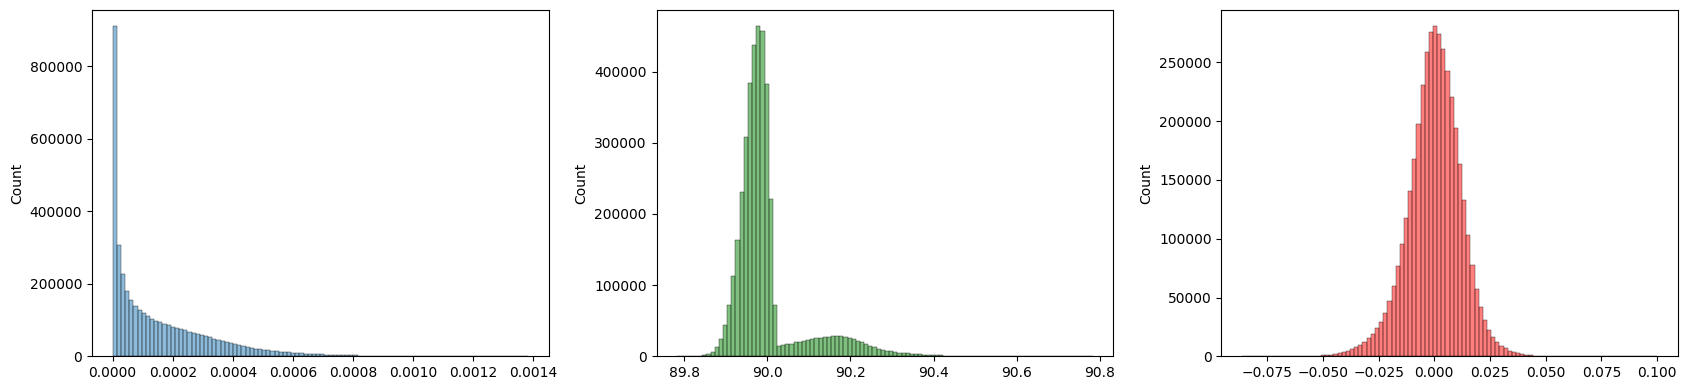

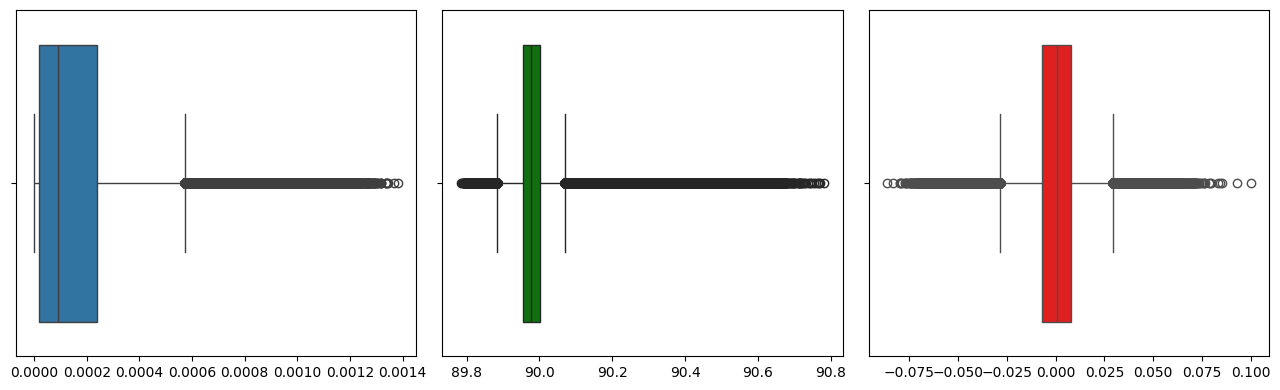

In [4]:
# Flatten the arrays for Target Variables Hiistograms

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (17,4))
sns.histplot(x =rain.flatten(), bins=100, alpha=0.5, ax = axes[0])
sns.histplot(x =height.flatten(), bins=100, alpha=0.5, ax = axes[1],color="green")
sns.histplot(x =velocity.flatten(), bins=100, alpha=0.5, ax = axes[2],color = "red")
plt.tight_layout()
plt.show()

# Flatten the arrays for Target Variables Boxplots
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (13,4))
sns.boxplot(x = rain.flatten(),ax = axes[0])
sns.boxplot(x = height.flatten(),ax = axes[1],color= "green")
sns.boxplot(x = velocity.flatten(),ax = axes[2],color="red")
plt.tight_layout()
plt.show()

### 3.4 Univariate Analysis - Features

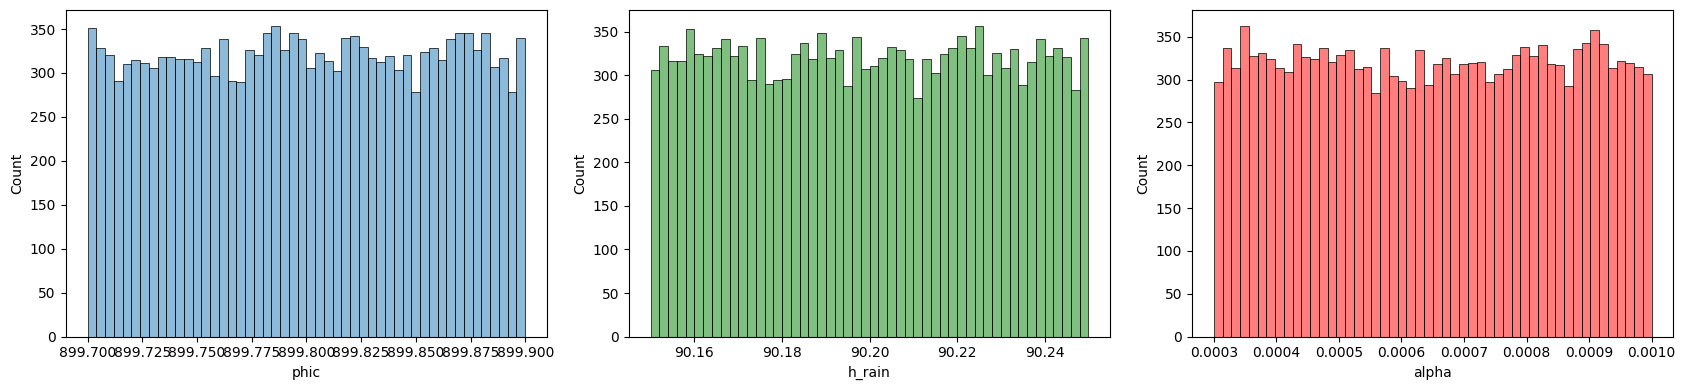

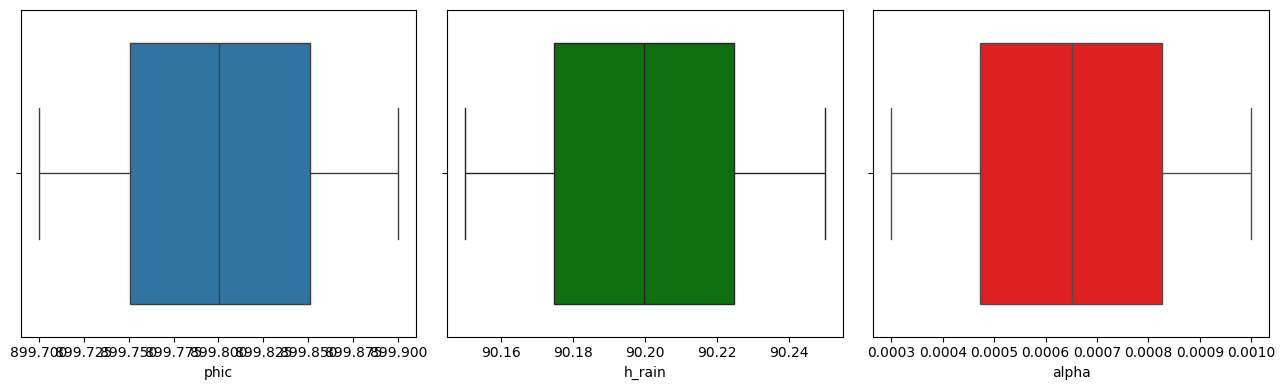

In [9]:
# Histograms Features
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (17,4))
sns.histplot(x =data["phic"], bins=50, alpha=0.5, ax = axes[0])
sns.histplot(x =data["h_rain"], bins=50, alpha=0.5, ax = axes[1],color="green")
sns.histplot(x =data["alpha"], bins=50, alpha=0.5, ax = axes[2],color = "red")
plt.tight_layout()
plt.show()

# Boxplot Features
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (13,4))
sns.boxplot(x =data["phic"],ax = axes[0])
sns.boxplot(x =data["h_rain"],ax = axes[1],color= "green")
sns.boxplot(x =data["alpha"],ax = axes[2],color="red")
plt.tight_layout()
plt.show()

In [7]:
print("\nInformation about the data:" )
data.info()
print("\nStatistical Information: ")
data.describe()


Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   phic      16035 non-null  float64
 1   h_rain    16035 non-null  float64
 2   alpha     16035 non-null  float64
 3   Velocity  16035 non-null  object 
 4   Height    16035 non-null  object 
 5   Rain      16035 non-null  object 
dtypes: float64(3), object(3)
memory usage: 751.8+ KB

Statistical Information: 


,phic,h_rain,alpha
count,16035.000000,16035.000000,16035.000000
mean,899.800308,90.199939,0.000650
std,0.057662,0.028921,0.000203
min,899.700001,90.150005,0.000300
25%,899.750634,90.174691,0.000472
50%,899.800010,90.199881,0.000651
75%,899.850600,90.224874,0.000826
max,899.899991,90.249995,0.001000


### 3.5 Multivariate Analysis 

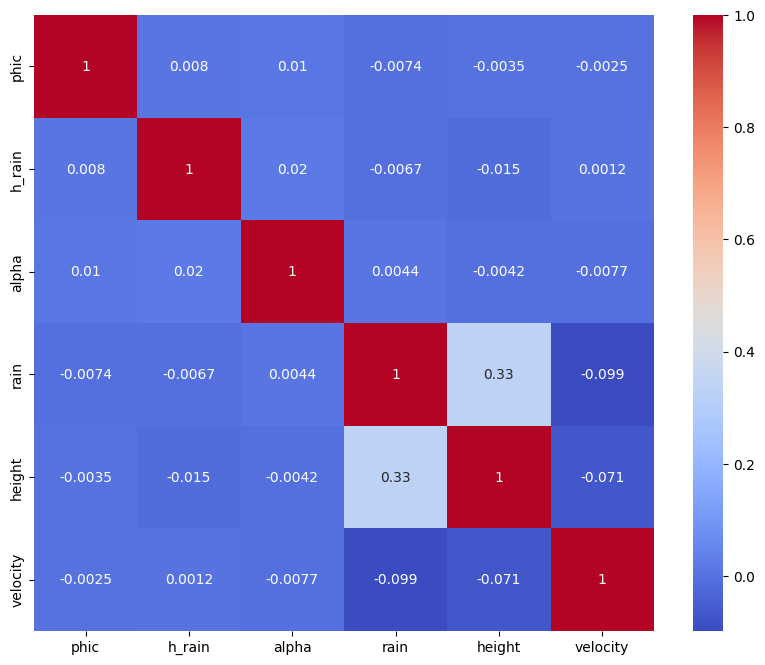

In [17]:
# DataFrame with features arrays
data_flattened = pd.DataFrame({
    'rain': rain.flatten(),
    'height': height.flatten(),
    'velocity': velocity.flatten()
})

# Concatenate the df
df_combined = pd.concat([data[["phic", "h_rain", "alpha"]], data_flattened], axis=1)

# Heatmap
corr = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()